<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Step 1: Download the CSV file
import urllib.request

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
filename = "survey-data.csv"

urllib.request.urlretrieve(url, filename)

# Step 2: Import required libraries
import pandas as pd
import sqlite3

# Step 3: Load CSV into Pandas DataFrame
df = pd.read_csv(filename)
print("Data loaded. Here are the first 5 rows:")
print(df.head())

# Step 4: Create SQLite connection and insert data into table named 'main'
conn = sqlite3.connect('survey-data.sqlite')
df.to_sql('main', conn, if_exists='replace', index=False)
print("Data inserted into SQLite database 'survey-data.sqlite' in table 'main'.")

# Step 5: Run a simple test query to verify
test_query = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(test_query, conn)
print("Sample data from SQLite:")
print(df_check)

# The connection 'conn' remains open for you to run further SQL queries and visualizations.


Data loaded. Here are the first 5 rows:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                N

**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


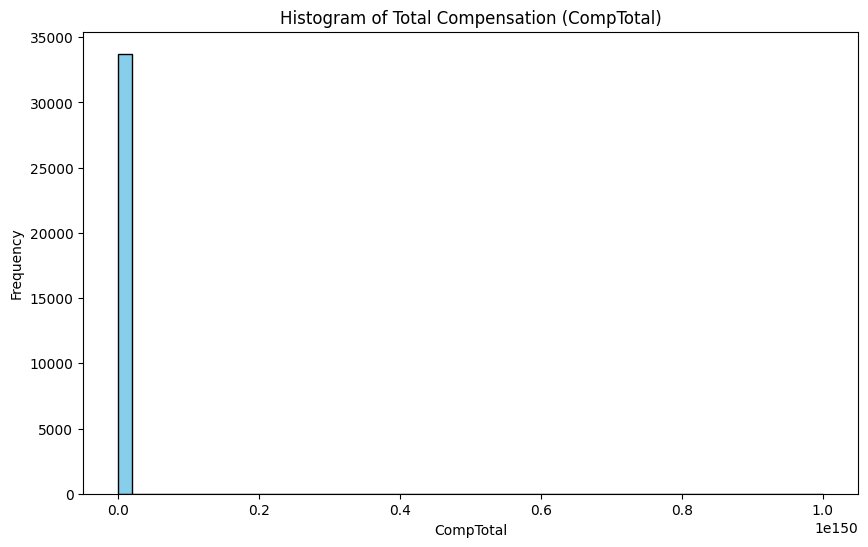

In [10]:
QUERY = """
SELECT CompTotal FROM main
WHERE CompTotal IS NOT NULL
"""
df_comp = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10,6))
plt.hist(df_comp['CompTotal'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('CompTotal')
plt.ylabel('Frequency')
plt.show()


**Box Plots**

Plot a box plot of Age.


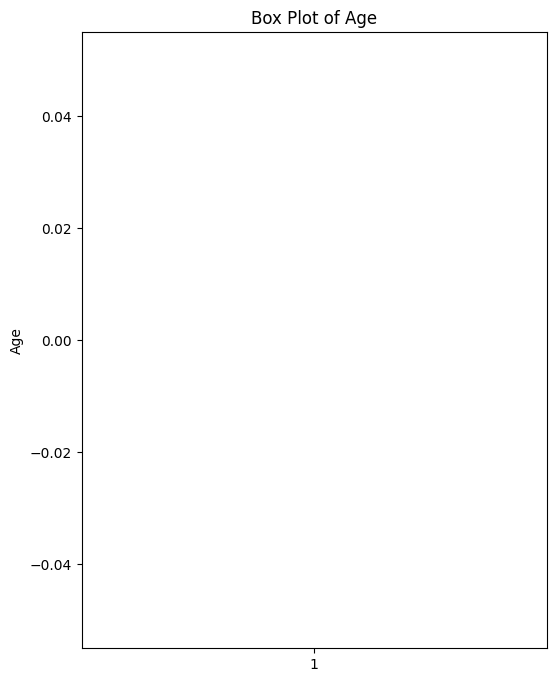

In [13]:
QUERY = """
SELECT Age FROM main
WHERE Age IS NOT NULL
"""

df_age = pd.read_sql_query(QUERY, conn)

# Convert Age to numeric, coercing errors to NaN, then drop NaNs
df_age['Age'] = pd.to_numeric(df_age['Age'], errors='coerce')
df_age = df_age.dropna()

plt.figure(figsize=(6,8))
plt.boxplot(df_age['Age'], vert=True, patch_artist=True)
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


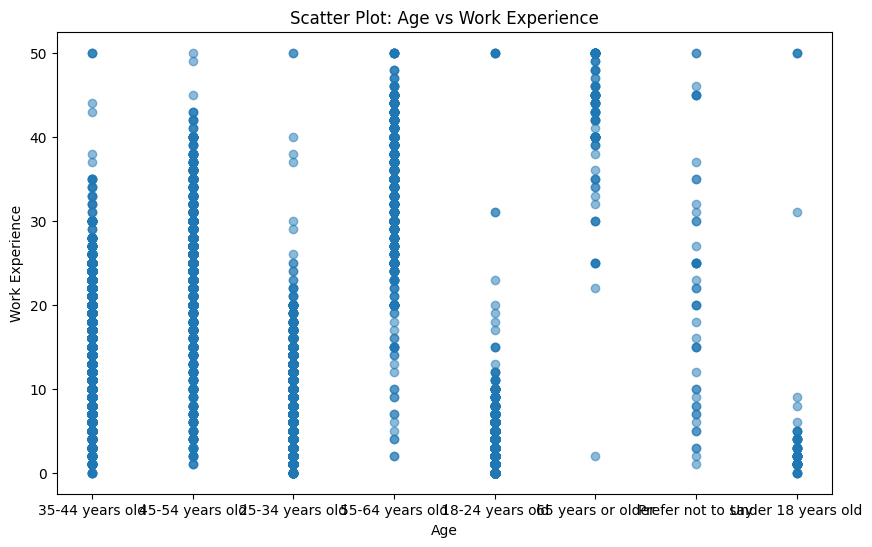

In [14]:
QUERY = """
SELECT Age, WorkExp FROM main
WHERE Age IS NOT NULL AND WorkExp IS NOT NULL
"""
df_scatter = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10,6))
plt.scatter(df_scatter['Age'], df_scatter['WorkExp'], alpha=0.5)
plt.title('Scatter Plot: Age vs Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.show()


**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


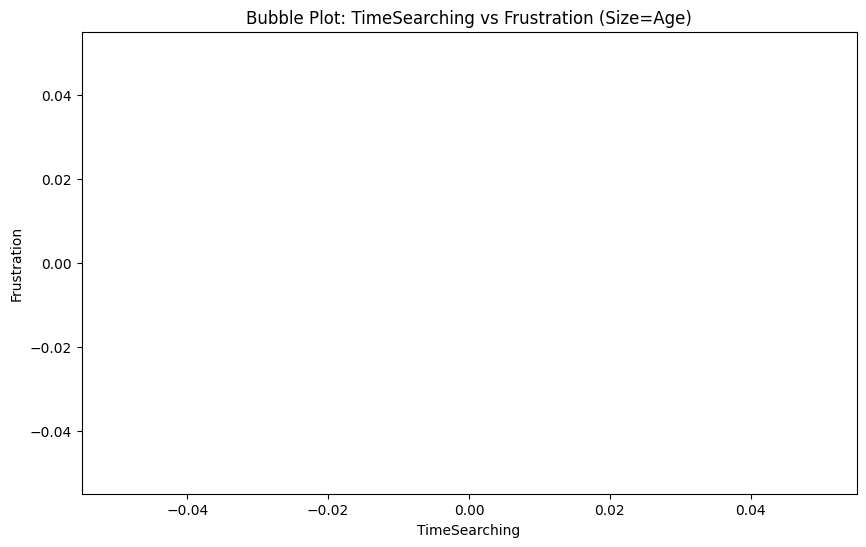

In [16]:
QUERY = """
SELECT TimeSearching, Frustration, Age FROM main
"""

df_bubble = pd.read_sql_query(QUERY, conn)

# Convert columns to numeric, coercing errors to NaN
df_bubble['TimeSearching'] = pd.to_numeric(df_bubble['TimeSearching'], errors='coerce')
df_bubble['Frustration'] = pd.to_numeric(df_bubble['Frustration'], errors='coerce')
df_bubble['Age'] = pd.to_numeric(df_bubble['Age'], errors='coerce')

# Drop rows with any NaN in these columns
df_bubble = df_bubble.dropna(subset=['TimeSearching', 'Frustration', 'Age'])

plt.figure(figsize=(10,6))
plt.scatter(
    df_bubble['TimeSearching'], 
    df_bubble['Frustration'], 
    s=df_bubble['Age'] * 2,  # Bubble size scaled by Age
    alpha=0.5, 
    c='orange', 
    edgecolors='w', 
    linewidth=0.5
)
plt.title('Bubble Plot: TimeSearching vs Frustration (Size=Age)')
plt.xlabel('TimeSearching')
plt.ylabel('Frustration')
plt.show()


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


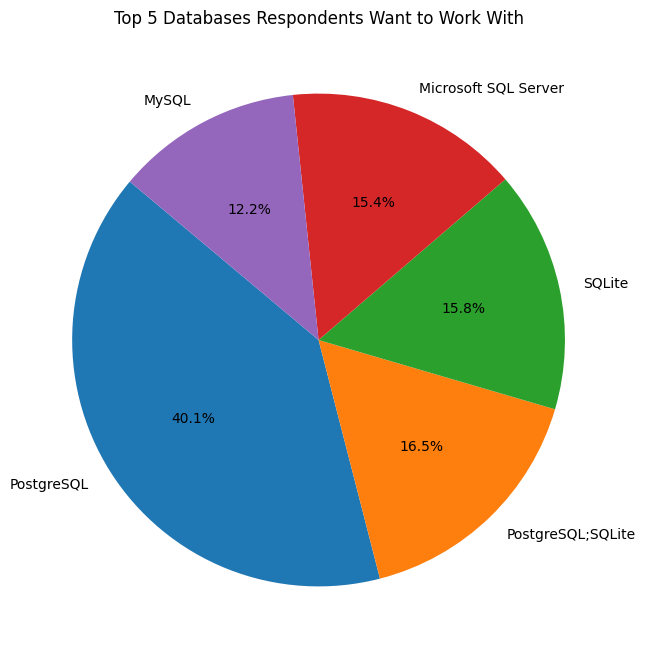

In [17]:
QUERY = """
SELECT DatabaseWantToWorkWith, COUNT(*) as count
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL AND DatabaseWantToWorkWith != ''
GROUP BY DatabaseWantToWorkWith
ORDER BY count DESC
LIMIT 5
"""
df_pie = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(8,8))
plt.pie(df_pie['count'], labels=df_pie['DatabaseWantToWorkWith'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Respondents Want to Work With')
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


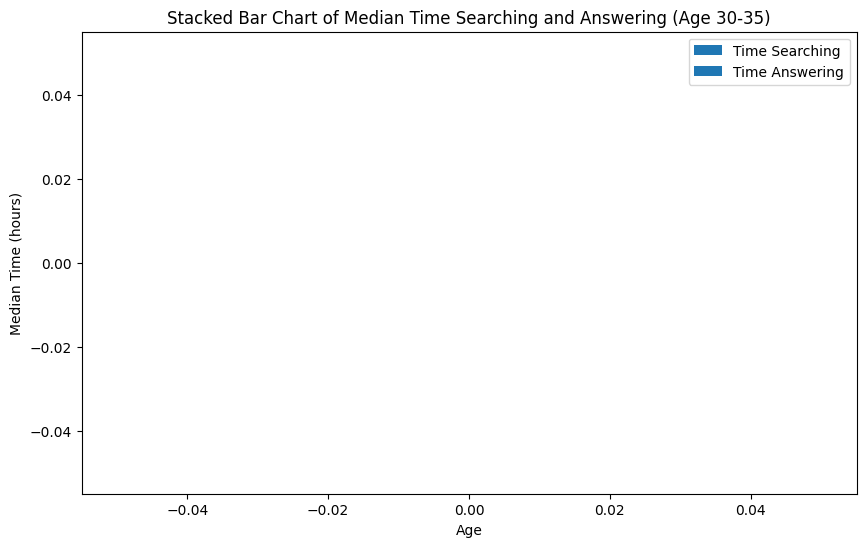

In [18]:
QUERY = """
SELECT Age,
       MEDIAN(TimeSearching) as median_searching,
       MEDIAN(TimeAnswering) as median_answering
FROM main
WHERE Age BETWEEN 30 AND 35
GROUP BY Age
ORDER BY Age
"""
# SQLite doesn't have MEDIAN built-in, so let's approximate by using AVG for demo:
QUERY = """
SELECT Age,
       AVG(TimeSearching) as median_searching,
       AVG(TimeAnswering) as median_answering
FROM main
WHERE Age BETWEEN 30 AND 35
GROUP BY Age
ORDER BY Age
"""
df_stack = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10,6))
plt.bar(df_stack['Age'], df_stack['median_searching'], label='Time Searching', alpha=0.7)
plt.bar(df_stack['Age'], df_stack['median_answering'], bottom=df_stack['median_searching'], label='Time Answering', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Median Time (hours)')
plt.title('Stacked Bar Chart of Median Time Searching and Answering (Age 30-35)')
plt.legend()
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


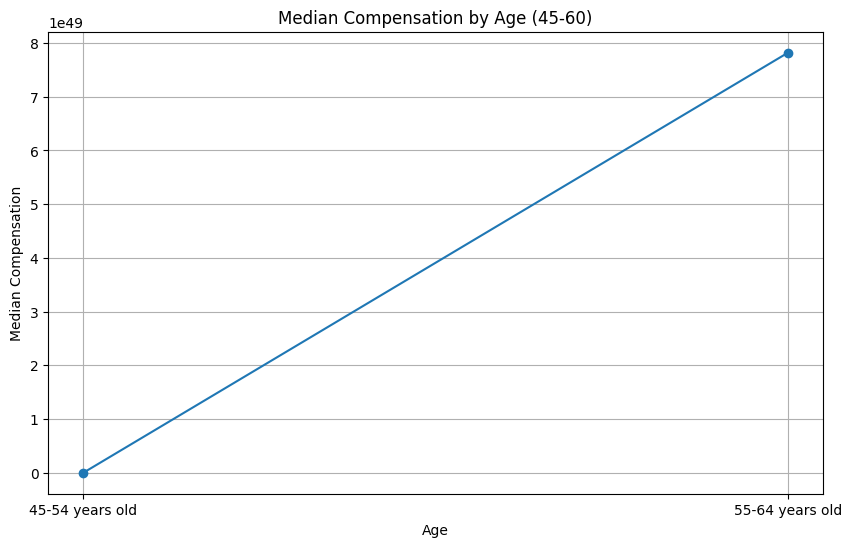

In [19]:
QUERY = """
SELECT Age,
       AVG(CompTotal) as median_comptotal
FROM main
WHERE Age BETWEEN 45 AND 60 AND CompTotal IS NOT NULL
GROUP BY Age
ORDER BY Age
"""
df_line = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10,6))
plt.plot(df_line['Age'], df_line['median_comptotal'], marker='o')
plt.title('Median Compensation by Age (45-60)')
plt.xlabel('Age')
plt.ylabel('Median Compensation')
plt.grid(True)
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


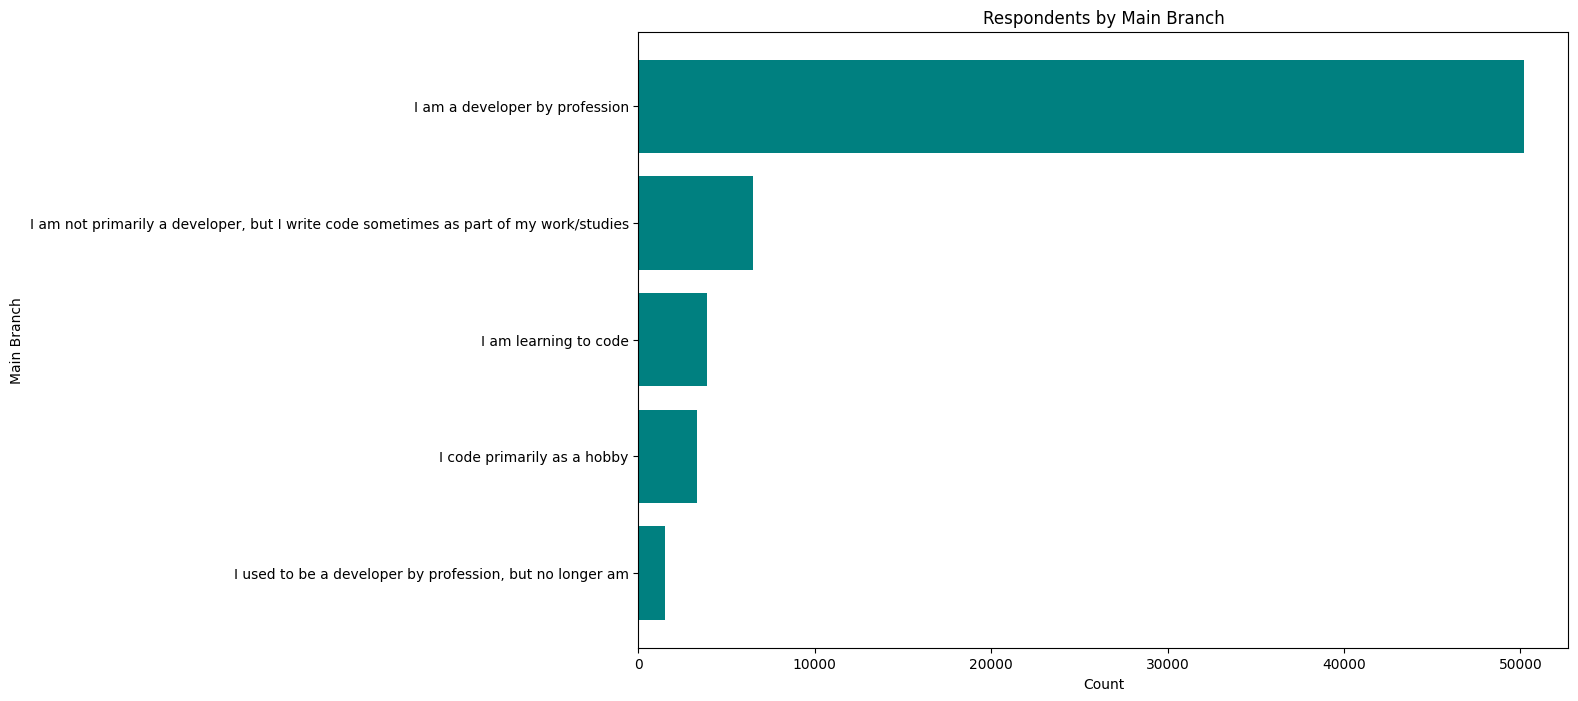

In [20]:
QUERY = """
SELECT MainBranch, COUNT(*) as count
FROM main
WHERE MainBranch IS NOT NULL AND MainBranch != ''
GROUP BY MainBranch
ORDER BY count DESC
"""
df_bar = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(12,8))
plt.barh(df_bar['MainBranch'], df_bar['count'], color='teal')
plt.title('Respondents by Main Branch')
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.gca().invert_yaxis()  # highest count on top
plt.show()


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
